# Table of Shortcuts

- [Gathering](#Gathering)
- [Assessing](#Assessing)
- [Observations](#Observations)
- [Cleaning](#Cleaning)
- [Visualizations](#Visualizations)
- [Sources](#sources)

# Importing Libraries 

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

In [4]:
import re
import requests
import os
import json

In [5]:
import warnings
warnings.filterwarnings
warnings.filterwarnings('ignore')

# Gathering 

In [6]:
#load twitter archive file into pandas df.
df_archive = pd.read_csv(r'twitter-archive-enhanced.csv')

In [7]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [8]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

In [9]:
response = requests.get(url)


with open("image_predictions_copy.tsv", "w") as outfile:
    outfile.write(response.text)

In [10]:
image_predictions = pd.read_csv("image_predictions_copy.tsv", delimiter='\t')

In [11]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,1.566650e-01,True,Shetland_sheepdog,6.142850e-02,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,7.419170e-02,True,Rhodesian_ridgeback,7.201000e-02,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,1.385840e-01,True,bloodhound,1.161970e-01,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,3.606870e-01,True,miniature_pinscher,2.227520e-01,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,2.436820e-01,True,Doberman,1.546290e-01,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,2.637880e-01,True,Greater_Swiss_Mountain_dog,1.619920e-02,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,5.827940e-02,True,fur_coat,5.444860e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,1.923050e-01,True,soft-coated_wheaten_terrier,8.208610e-02,True


In [12]:
url = "https://video.udacity-data.com/topher/2018/November/5bf60fda_tweet-json/tweet-json"

In [13]:
response = requests.get(url)
with open("json.txt", "w") as outfile:
    outfile.write(response.text)

In [14]:
data_frame = []
with open("json.txt", "r") as infile:
    for line in infile:
        data_frame.append(pd.read_json(line, lines=True))

tweet_json = pd.concat(data_frame, ignore_index=True)

In [15]:
tweet_json.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [16]:
json_file = open('json.txt', encoding='utf-8')
tweet_json = pd.read_json(json_file, lines=True)
tweet_json= tweet_json.rename(columns={"id": "tweet_id"})

json_file.close()
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [17]:
tweet_json= tweet_json[['tweet_id','retweet_count','favorite_count','in_reply_to_status_id']]
tweet_json.head()

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id
0,892420643555336193,8853,39467,NaN
1,892177421306343426,6514,33819,NaN
2,891815181378084864,4328,25461,NaN
3,891689557279858688,8964,42908,NaN
4,891327558926688256,9774,41048,NaN


# Assessing 

In [18]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [19]:
df_archive.duplicated().sum()

0

In [20]:
df_archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                           745
doggo                         2259
floofer                       2346
pupper                        2099
puppo                         2326
dtype: int64

In [21]:
df_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [22]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [23]:
df_archive[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [24]:
df_archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune

In [25]:
df_archive.name.value_counts()

name
a                 55
Charlie           12
Oliver            11
Cooper            11
Lucy              11
Lola              10
Tucker            10
Penny             10
Bo                 9
Winston            9
the                8
Sadie              8
Daisy              7
Buddy              7
Bailey             7
Toby               7
an                 7
Bella              6
Jack               6
Oscar              6
Rusty              6
Stanley            6
Scout              6
Jax                6
Leo                6
Milo               6
Koda               6
Dave               6
Oakley             5
Larry              5
Sunny              5
Louis              5
Chester            5
George             5
Alfie              5
Finn               5
very               5
Sammy              5
Gus                5
Phil               5
Bentley            5
Sampson            4
Reginald           4
quite              4
Boomer             4
Reggie             4
Loki               4
Dexter  

### looking for numerators with wrong values in chunks

In [26]:
df_archive[df_archive['rating_numerator'] <= 5].loc[0:1000, :]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,NaN,NaN,NaN,NaN
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,NaN,NaN,NaN,NaN,NaN
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,NaN,NaN,NaN,NaN,NaN
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882...,5,10,NaN,NaN,NaN,NaN,NaN
765,777885040357281792,NaN,NaN,2016-09-19 15:00:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wesley. He's clearly trespassing. Seem...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/777885040...,3,10,Wesley,NaN,NaN,NaN,NaN
883,760252756032651264,NaN,NaN,2016-08-01 23:15:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fido. He can tell the weather. Not goo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760252756...,4,10,Fido,NaN,NaN,NaN,NaN
912,757596066325864448,NaN,NaN,2016-07-25 15:19:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's another picture without a dog in it. Id...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757596066...,4,10,NaN,NaN,NaN,NaN,NaN
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,NaN,doggo,NaN,pupper,NaN


In [27]:
df_archive[df_archive.rating_numerator <= 5].loc[1000:2000, :][:5]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,NaN,NaN,NaN,NaN
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,NaN,NaN,NaN,NaN,NaN
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,NaN,NaN,NaN,NaN,NaN
1189,718246886998687744,NaN,NaN,2016-04-08 01:19:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alexanderson. He's got a weird ass bir...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718246886...,3,10,Alexanderson,NaN,NaN,NaN,NaN
1219,714631576617938945,NaN,NaN,2016-03-29 01:53:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Benedict. He's a feisty pup. Needs a b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714631576...,4,10,Benedict,NaN,NaN,NaN,NaN


In [28]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [29]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
image_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [31]:
image_predictions.duplicated().sum()

0

In [32]:
image_predictions['jpg_url'].duplicated().sum()

66

In [33]:
image_predictions['img_num'].value_counts()

img_num
1    1780
2     198
3      66
4      31
Name: count, dtype: int64

In [34]:
image_predictions['p1'].unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [35]:
image_predictions.p3.value_counts()

p3
Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
Pomeranian                        29
toy_poodle                        29
Pekinese                          29
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
Pembroke                          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       1

In [36]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [37]:
tweet_json.head()

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id
0,892420643555336193,8853,39467,NaN
1,892177421306343426,6514,33819,NaN
2,891815181378084864,4328,25461,NaN
3,891689557279858688,8964,42908,NaN
4,891327558926688256,9774,41048,NaN


In [38]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2354 non-null   int64  
 1   retweet_count          2354 non-null   int64  
 2   favorite_count         2354 non-null   int64  
 3   in_reply_to_status_id  78 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 73.7 KB


In [39]:
tweet_json.columns

Index(['tweet_id', 'retweet_count', 'favorite_count', 'in_reply_to_status_id'], dtype='object')

In [40]:
tweet_json.duplicated().sum()

0

In [41]:
tweet_json.describe()

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id
count,2.354000e+03,2354.000000,2354.000000,7.800000e+01
mean,7.426978e+17,3164.797366,8080.968564,7.455079e+17
std,6.852812e+16,5284.770364,11814.771334,7.582492e+16
min,6.660209e+17,0.000000,0.000000,6.658147e+17
25%,6.783975e+17,624.500000,1415.000000,6.757419e+17
50%,7.194596e+17,1473.500000,3603.500000,7.038708e+17
75%,7.993058e+17,3652.000000,10122.250000,8.257804e+17
max,8.924206e+17,79515.000000,132810.000000,8.862664e+17


# Observations

### Quality

1. Missing Values: The columns 'doggo', 'floofer', 'pupper', and 'puppo' contain missing data represented by 'None'.
2. Tweet Source: The 'source' column includes HTML anchor tags (links), which need to be processed to extract the actual tweet source and categorize it.
3. Timestamp Format: The 'timestamp' data is currently in text format and should be converted to a datetime format for proper analysis.
4. Retweets: The dataset contains retweets, which should be removed to focus on original tweets.
5. Rating Numerator: The 'rating_numerator' column should be numerical (float) and requires correct extraction.


## Tidiness

- The columns `doggo`, `floofer`, `pupper`, and `puppo` all represent different dog personalities.

# Cleaning

### copy from our data frames to work on cleaning it.

In [42]:
df_arch_cleaned = df_archive.copy()
df_pred_cleaned = image_predictions.copy()
df_api_cleaned = tweet_json.copy()

### Define
Replace 'None' with `np.nan` for Columns (`doggo`, `floofer`, `pupper`, `puppo`).

### Code

In [43]:
col_list = ['doggo', 'floofer', 'pupper', 'puppo']
for i in col_list:
    df_arch_cleaned[i] = df_arch_cleaned[i].replace('None', np.nan)

### Test

In [44]:
df_arch_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [45]:
df_arch_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

### Define
Remove ratings and links from `text` column using `RegEx`.

### Code

In [46]:
df_arch_cleaned.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [47]:
def clean_text(text):

  cleaned_text = re.sub(r"https?://\S+", "", text)

  cleaned_text = re.sub(r"\s\d+/\d+$", "", cleaned_text)

  
  return cleaned_text


In [48]:
cleaned_series = df_arch_cleaned.text.apply(clean_text)

### Test

In [49]:
df_arch_cleaned.text.sample(20)

1618    For those who claim this is a goat, u are wron...
807     Doggo will persevere. 13/10\nhttps://t.co/yOVz...
105     This is Kody. He's a baller. Wishes he was a l...
1484    This is Bodie. He's not proud of what he did, ...
735     We normally don't rate lobsters, but this one ...
948     Here's a doggo trying to catch some fish. 8/10...
1672    Meet Brody. He's a Downton Abbey Falsetto. Add...
1969    Take a moment and appreciate how these two dog...
452     This is Bear. He's a passionate believer of th...
829     RT @dog_rates: When it's Janet from accounting...
1172    This is Ralphé. He patrols the lake. Looking f...
1291    This is Cooper. He basks in the glory of rebel...
693     This is Rory. He's got an interview in a few m...
2267    Another topnotch dog. His name is Big Jumpy Ra...
571     This is Wallace. He'll be your chau-fur this e...
1033    This is Jeffrey. He wasn't prepared to execute...
160     RT @tallylott: h*ckin adorable promposal. 13/1...
1344    When y

### Define
Converte `timestamp` column to datetime.

### Code

In [50]:
df_arch_cleaned.timestamp = pd.to_datetime(df_arch_cleaned.timestamp)

### Test

In [51]:
df_arch_cleaned.timestamp.dtype

datetime64[ns, UTC]

### Define
Remove retweets and replies.

### Code

In [52]:
cols = ['in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id', 'retweeted_status_timestamp']
df_arch_cleaned.drop(columns = cols, axis=1, inplace=True)

### Test

In [53]:
df_arch_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2356 non-null   int64              
 1   in_reply_to_status_id  78 non-null     float64            
 2   timestamp              2356 non-null   datetime64[ns, UTC]
 3   source                 2356 non-null   object             
 4   text                   2356 non-null   object             
 5   expanded_urls          2297 non-null   object             
 6   rating_numerator       2356 non-null   int64              
 7   rating_denominator     2356 non-null   int64              
 8   name                   1611 non-null   object             
 9   doggo                  97 non-null     object             
 10  floofer                10 non-null     object             
 11  pupper                 257 non-null    object           

### Define
Remove values other than 10 for rating_denominator

### Code

In [54]:
df_arch_cleaned = df_arch_cleaned[df_arch_cleaned['rating_denominator'] == 10]

### Test

In [55]:
df_arch_cleaned[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2333.000000,2333.0
mean,12.237462,10.0
std,41.022472,0.0
min,0.000000,10.0
25%,10.000000,10.0
50%,11.000000,10.0
75%,12.000000,10.0
max,1776.000000,10.0


### Define
Remove any rows not related to dogs

### Code

In [56]:
df_arch_cleaned = df_arch_cleaned[~df_arch_cleaned.text.isnull()]

In [57]:
df_arch_cleaned = df_arch_cleaned.loc[~df_arch_cleaned.text.str.match('.*only rate dogs')]

### Test

In [58]:
df_arch_cleaned.loc[df_arch_cleaned.text.str.match('.*only rate dogs')]

,tweet_id,in_reply_to_status_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [59]:
df_arch_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2269 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2269 non-null   int64              
 1   in_reply_to_status_id  72 non-null     float64            
 2   timestamp              2269 non-null   datetime64[ns, UTC]
 3   source                 2269 non-null   object             
 4   text                   2269 non-null   object             
 5   expanded_urls          2214 non-null   object             
 6   rating_numerator       2269 non-null   int64              
 7   rating_denominator     2269 non-null   int64              
 8   name                   1580 non-null   object             
 9   doggo                  97 non-null     object             
 10  floofer                10 non-null     object             
 11  pupper                 257 non-null    object             
 1

### Define
Drop rows with NaNs for `expanded_urls` column.

### Code

In [60]:
df_arch_cleaned = df_arch_cleaned.loc[~df_arch_cleaned.expanded_urls.isnull()]

### Test

In [61]:
df_arch_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2214 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2214 non-null   int64              
 1   in_reply_to_status_id  21 non-null     float64            
 2   timestamp              2214 non-null   datetime64[ns, UTC]
 3   source                 2214 non-null   object             
 4   text                   2214 non-null   object             
 5   expanded_urls          2214 non-null   object             
 6   rating_numerator       2214 non-null   int64              
 7   rating_denominator     2214 non-null   int64              
 8   name                   1580 non-null   object             
 9   doggo                  94 non-null     object             
 10  floofer                10 non-null     object             
 11  pupper                 255 non-null    object             
 1

### Define
Create `dog_stage` column and remove the (`doggo`, `floofer`, `pupper`, `puppo`) columns.

### Code

In [62]:
# Combine the 'doggo', 'floofer', 'pupper', 'puppo' columns into a single 'dog_stage' column
df_arch_cleaned['dog_stage'] = df_arch_cleaned[['doggo', 'floofer', 'pupper', 'puppo']].\
                                        fillna('').agg(', '.join, axis=1).str.strip(', ')

# Replace empty strings with NaN and convert the 'dog_stage' column to a categorical type
df_arch_cleaned['dog_stage'] = df_arch_cleaned['dog_stage'].replace('', np.nan).astype('category')

# Drop the original 'doggo', 'floofer', 'pupper', and 'puppo' columns
df_arch_cleaned.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

### Test

In [63]:
df_arch_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2214 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2214 non-null   int64              
 1   in_reply_to_status_id  21 non-null     float64            
 2   timestamp              2214 non-null   datetime64[ns, UTC]
 3   source                 2214 non-null   object             
 4   text                   2214 non-null   object             
 5   expanded_urls          2214 non-null   object             
 6   rating_numerator       2214 non-null   int64              
 7   rating_denominator     2214 non-null   int64              
 8   name                   1580 non-null   object             
 9   dog_stage              374 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 175.5+ KB


In [64]:
df_arch_cleaned.dog_stage.value_counts()

dog_stage
pupper              243
doggo                80
puppo                28
doggo, , pupper      12
floofer               9
doggo, , , puppo      1
doggo, floofer        1
Name: count, dtype: int64

### Define
- Remove `img_num` column from df_pred_cleand.

### Code

In [66]:
df_pred_cleaned.drop('img_num', axis=1, inplace=True)

### Test

In [67]:
df_pred_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   p1        2075 non-null   object 
 3   p1_conf   2075 non-null   float64
 4   p1_dog    2075 non-null   bool   
 5   p2        2075 non-null   object 
 6   p2_conf   2075 non-null   float64
 7   p2_dog    2075 non-null   bool   
 8   p3        2075 non-null   object 
 9   p3_conf   2075 non-null   float64
 10  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.9+ KB


## Define
#### Create new columns breed and confidence to store the predictions with the highest confidence, then remove the remaining columns.

### Code

In [84]:
breed = []
confidence = []

for index, row in df_pred_cleaned.iterrows():
    if row['p1_dog']:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog']:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog']:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append(np.nan)
        confidence.append(np.nan)
        
df_pred_cleaned['breed'] = breed
df_pred_cleaned['confidence'] = confidence


In [85]:
df_pred_cleaned = df_pred_cleaned[['tweet_id', 'jpg_url', 'breed', 'confidence']]

### Test

In [88]:
df_pred_cleaned.sample(2)

,tweet_id,jpg_url,breed,confidence
476,675153376133427200,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg,NaN,NaN
1578,796149749086875649,https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg,golden_retriever,0.600276


In [87]:
df_pred_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   int64  
 1   jpg_url     2075 non-null   object 
 2   breed       1751 non-null   object 
 3   confidence  1751 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 65.0+ KB


In [403]:
df_api_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2354 non-null   int64  
 1   retweet_count          2354 non-null   int64  
 2   favorite_count         2354 non-null   int64  
 3   in_reply_to_status_id  78 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 73.7 KB


In [404]:
df_api_cleaned.describe()

,id,retweet_count,favorite_count,in_reply_to_status_id
count,2.354000e+03,2354.000000,2354.000000,7.800000e+01
mean,7.426978e+17,3164.797366,8080.968564,7.455079e+17
std,6.852812e+16,5284.770364,11814.771334,7.582492e+16
min,6.660209e+17,0.000000,0.000000,6.658147e+17
25%,6.783975e+17,624.500000,1415.000000,6.757419e+17
50%,7.194596e+17,1473.500000,3603.500000,7.038708e+17
75%,7.993058e+17,3652.000000,10122.250000,8.257804e+17
max,8.924206e+17,79515.000000,132810.000000,8.862664e+17


In [405]:
df_api_cleaned.columns

Index(['id', 'retweet_count', 'favorite_count', 'in_reply_to_status_id'], dtype='object')

In [406]:
df_api_cleaned.duplicated().sum()

0

In [407]:
df_api_cleaned.isna().sum()

id                          0
retweet_count               0
favorite_count              0
in_reply_to_status_id    2276
dtype: int64

### Define
Merge all datasets to one

In [408]:
tweet_json.columns

Index(['id', 'retweet_count', 'favorite_count', 'in_reply_to_status_id'], dtype='object')

In [413]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'breed', 'confidence'],
      dtype='object')

In [425]:
df = pd.merge(ariche_dfive,df_pred_cleaned, how='inner', on=['tweet_id'])
df= pd.merge(df,tweet_json, how='inner', on=['tweet_id'])
df.head(2)

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,breed,confidence,created_at,id_str,full_text,truncated,display_text_range,entities,extended_entities,source_y,in_reply_to_status_id_y,in_reply_to_status_id_str,in_reply_to_user_id_y,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,NaN,2017-08-01 16:23:56+00:00,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,8853,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,2017-08-01 00:17:27+00:00,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,6514,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2073 non-null   int64              
 1   in_reply_to_status_id_x        23 non-null     float64            
 2   in_reply_to_user_id_x          23 non-null     float64            
 3   timestamp                      2073 non-null   object             
 4   source_x                       2073 non-null   object             
 5   text                           2073 non-null   object             
 6   retweeted_status_id            79 non-null     float64            
 7   retweeted_status_user_id       79 non-null     float64            
 8   retweeted_status_timestamp     79 non-null     object             
 9   expanded_urls                  2073 non-null   object             
 10  rating_numerator        

### Define
Combine the rating_numerator and rating_denominator columns into a new column named rating.

## code

In [416]:
df['rating']=df['rating_numerator']/df['rating_denominator']

### Test

In [417]:
df['rating'].head()

0    1.3
1    1.3
2    1.3
3    1.3
4    1.3
Name: rating, dtype: float64

save the dataframe in csv file and called it twitter_archive_master

In [418]:
df.to_csv('twitter_archive_master.csv',encoding='utf-8')

# Visualizations

In [70]:
final_df = pd.read_csv('twitter_archive_master.csv')
final_df.head(2)

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,breed,confidence,retweet_count,favorite_count,rating
0,0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,NaN,8853,39467,1.3
1,1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,6514,33819,1.3


In [71]:
final_df.dog_stage.value_counts()

dog_stage
pupper            205
doggo              66
puppo              22
doggo, pupper      11
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: count, dtype: int64

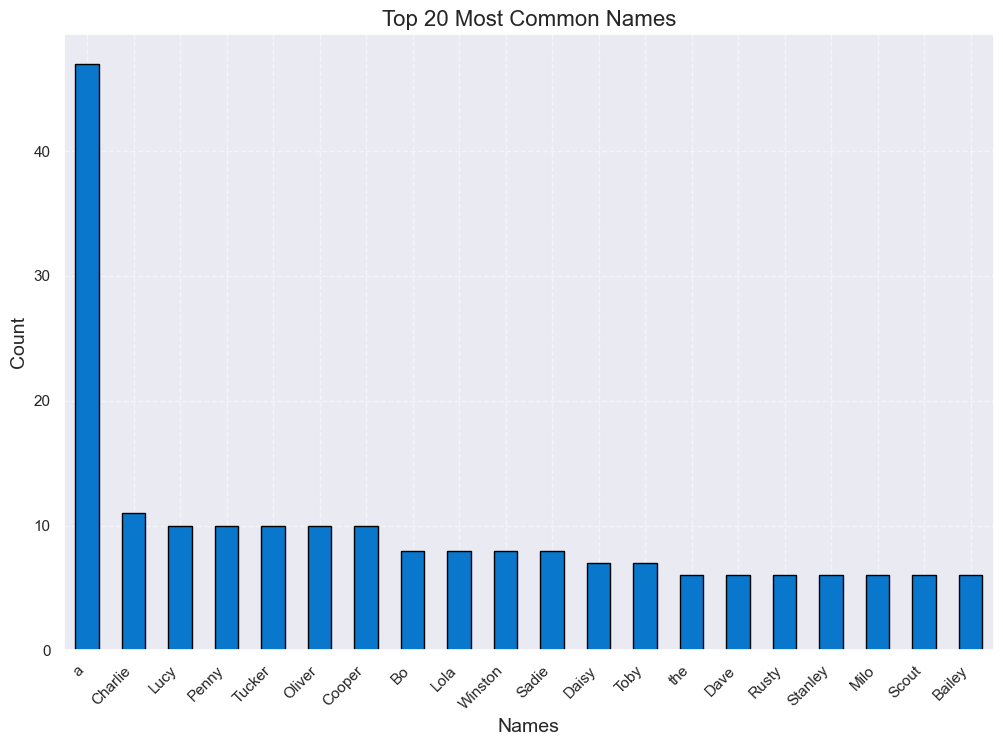

In [72]:
import matplotlib.pyplot as plt

# Creating the bar plot
plt.figure(figsize=(12, 8))
final_df.name.value_counts()[:20].plot.bar(color='#0877cc', edgecolor='black')

# Adding labels and title
plt.title('Top 20 Most Common Names', fontsize=16)
plt.xlabel('Names', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Customizing the plot design
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45, ha='right')

# Displaying the plot
plt.show()


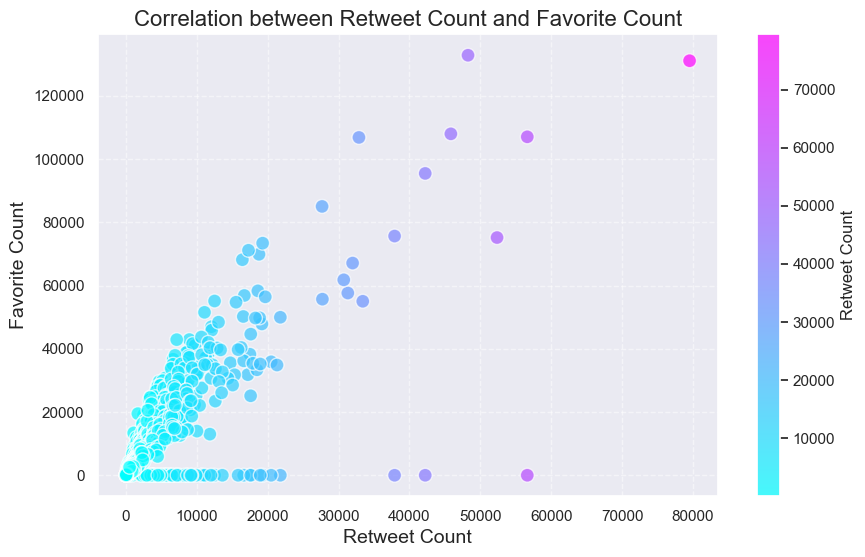

In [73]:
import matplotlib.pyplot as plt

# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x=final_df.retweet_count, y=final_df.favorite_count, alpha=0.7, edgecolors='w', s=100, c=final_df.retweet_count, cmap='cool')

# Adding labels and title
plt.title('Correlation between Retweet Count and Favorite Count', fontsize=16)
plt.xlabel('Retweet Count', fontsize=14)
plt.ylabel('Favorite Count', fontsize=14)

# Customizing the plot design
plt.grid(True, linestyle='--', alpha=0.5)
plt.colorbar(label='Retweet Count')  # Adding a color bar to indicate the retweet count values

# Displaying the plot
plt.show()


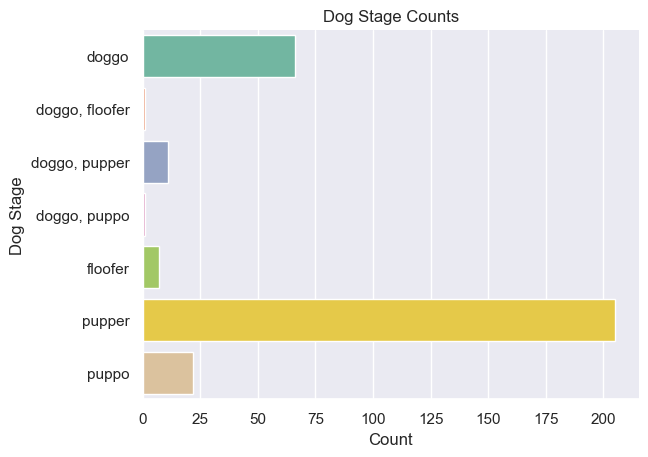

In [74]:
# Assuming final_df is already defined and contains the data
data = final_df.groupby('dog_stage').count()['tweet_id']

# Setting a different color palette
palette = sns.color_palette("Set2")

# Creating the barplot
ax = sns.barplot(y=data.index, x=data.values, palette=palette)

# Setting plot labels and title
ax.set(xlabel='Count', ylabel='Dog Stage', title='Dog Stage Counts')

# Customizing the plot design (optional)
sns.set_style("whitegrid")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Displaying the plot
plt.show()

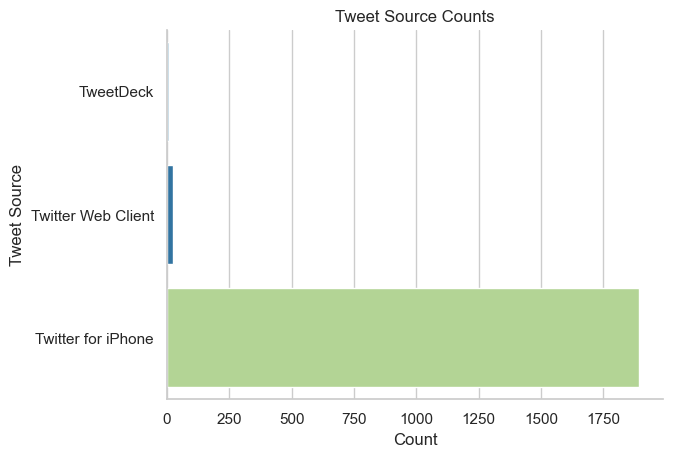

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming final_df is already defined and contains the data
data = final_df.groupby('source').count()['tweet_id']

# Setting a different color palette
palette = sns.color_palette("Paired")

# Creating the barplot
ax = sns.barplot(y=data.index, x=data.values, palette=palette)

# Setting plot labels and title
ax.set(xlabel='Count', ylabel='Tweet Source', title='Tweet Source Counts')

# Customizing the plot design (optional)
sns.set_style("whitegrid")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Displaying the plot
plt.show()


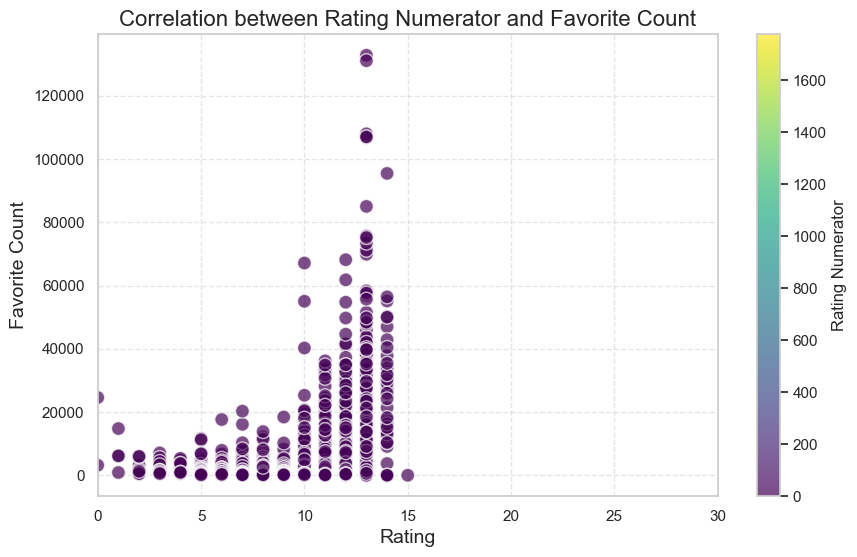

In [76]:
import matplotlib.pyplot as plt

# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y=final_df.favorite_count, x=final_df.rating_numerator, alpha=0.7, edgecolors='w', s=100, c=final_df.rating_numerator, cmap='viridis')

# Adding labels and title
plt.title('Correlation between Rating Numerator and Favorite Count', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Favorite Count', fontsize=14)
plt.xlim(0, 30)

# Customizing the plot design
plt.grid(True, linestyle='--', alpha=0.5)
plt.colorbar(label='Rating Numerator')  # Adding a color bar to indicate the rating values

# Displaying the plot
plt.show()


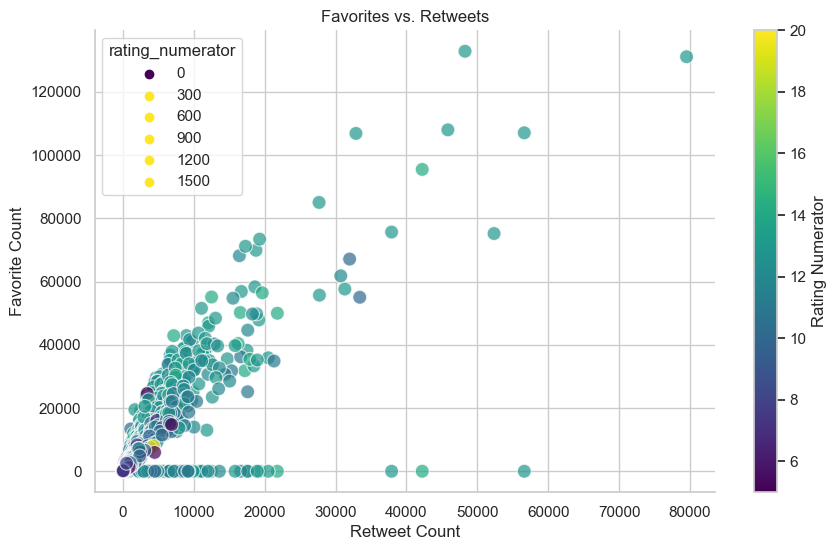

In [77]:
# Creating the scatter plot
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='retweet_count', y='favorite_count', data=final_df,
                     hue='rating_numerator', hue_norm=(5, 20), palette='viridis', s=100, edgecolor='w', alpha=0.7)

# Adding labels and title
ax.set(xlabel='Retweet Count', ylabel='Favorite Count', title='Favorites vs. Retweets')

# Customizing the plot design
sns.set_style("whitegrid")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adding a color bar to indicate the rating values
norm = plt.Normalize(5, 20)
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label='Rating Numerator')

# Displaying the plot
plt.show()

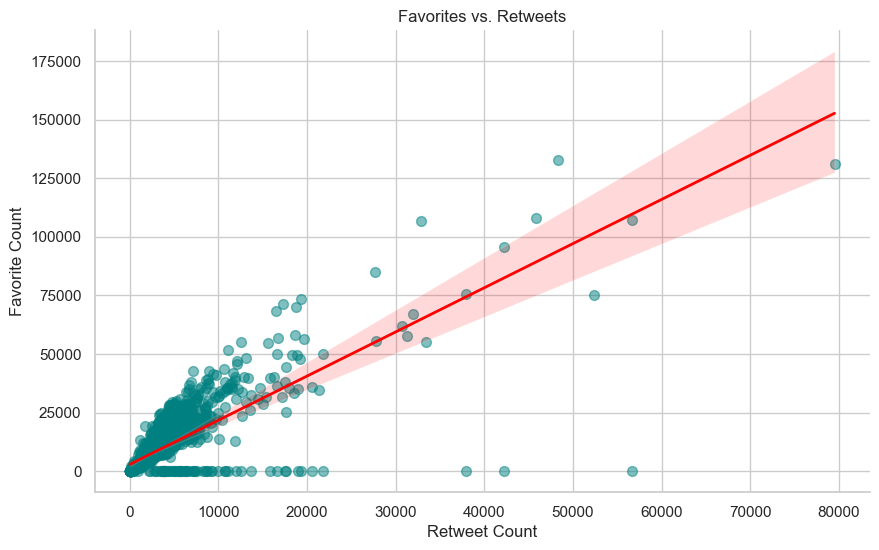

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating the regression plot
plt.figure(figsize=(10, 6))
ax = sns.regplot(x='retweet_count', y='favorite_count', data=final_df, color='teal', scatter_kws={'s':50, 'alpha':0.5}, line_kws={'color': 'red', 'lw': 2})

# Adding labels and title
ax.set(xlabel='Retweet Count', ylabel='Favorite Count', title='Favorites vs. Retweets')

# Customizing the plot design
sns.set_style("whitegrid")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Displaying the plot
plt.show()


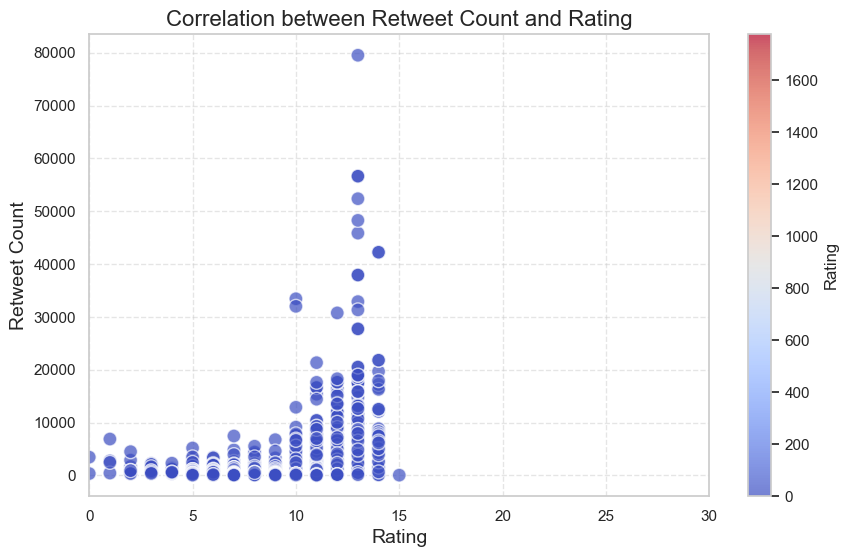

In [79]:
import matplotlib.pyplot as plt

# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y=final_df.retweet_count, x=final_df.rating_numerator, alpha=0.7, edgecolors='w', s=100, c=final_df.rating_numerator, cmap='coolwarm')

# Adding labels and title
plt.title('Correlation between Retweet Count and Rating', fontsize=16)
plt.ylabel('Retweet Count', fontsize=14)
plt.xlabel('Rating', fontsize=14)
plt.xlim(0, 30)

# Customizing the plot design
plt.grid(True, linestyle='--', alpha=0.5)
plt.colorbar(label='Rating')  # Adding a color bar to indicate the rating values

# Displaying the plot
plt.show()


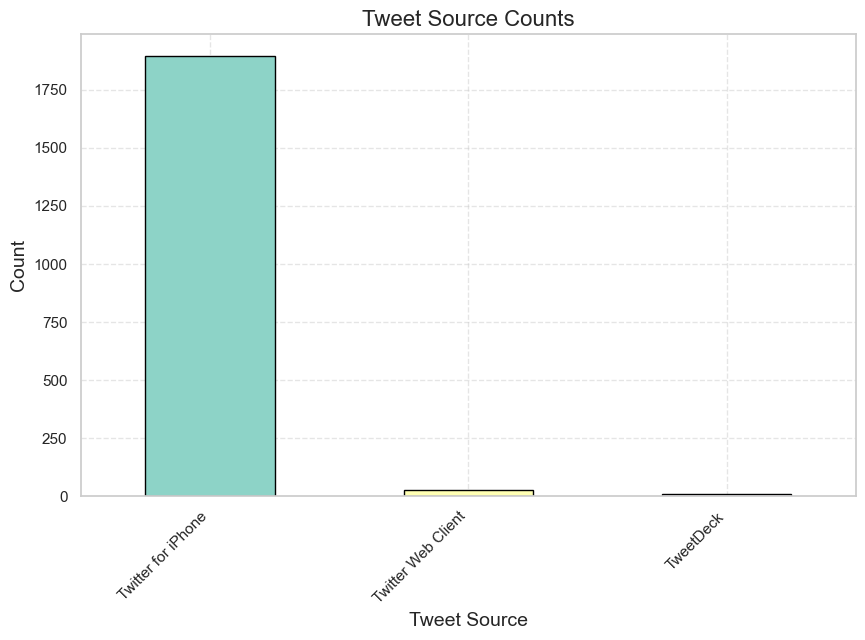

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting a different color palette
palette = sns.color_palette("Set3")

# Creating the bar plot
plt.figure(figsize=(10, 6))
final_df.source.value_counts().plot.bar(color=palette, edgecolor='black')

# Adding labels and title
plt.title('Tweet Source Counts', fontsize=16)
plt.xlabel('Tweet Source', fontsize=14)
plt.ylabel('Count', fontsize=14)
# Customizing the plot design
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45, ha='right')

# Displaying the plot
plt.show()


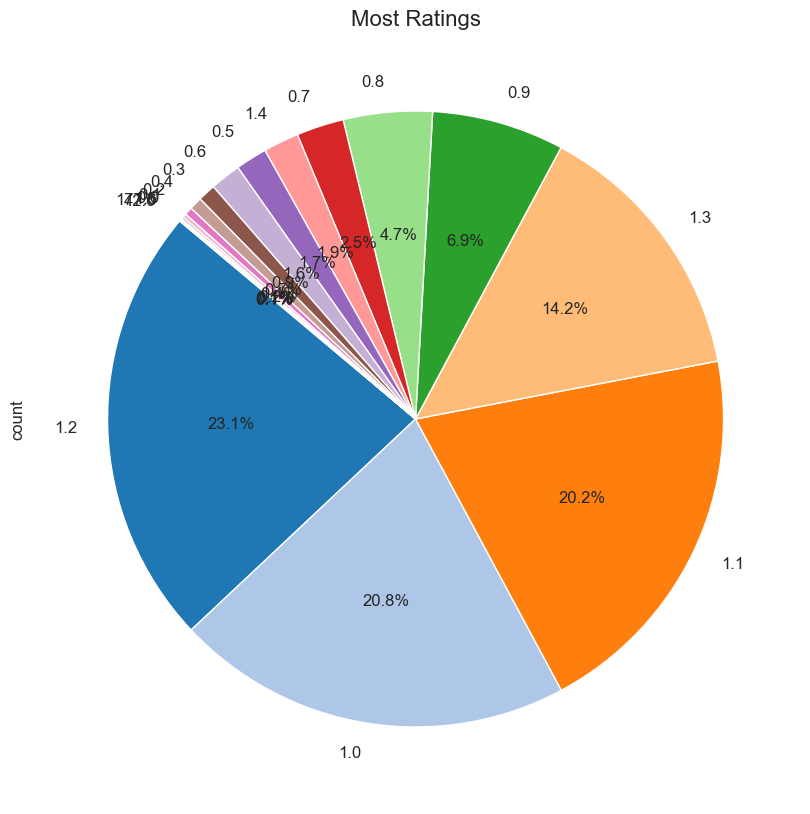

In [82]:


# Setting a different color palette
palette = sns.color_palette("tab20")

# Creating the pie plot
plt.figure(figsize=(15, 10))
final_df.rating.value_counts().plot.pie(autopct='%1.1f%%', colors=palette, startangle=140, textprops={'fontsize': 12})

# Adding title
plt.title('Most Ratings', fontsize=16)

# Displaying the plot
plt.show()
